# **Лабораторная работа № 6.**
### по курсу «Нейроинформатика»
## **Тема: Сети Кохонена**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:

## **Цель работы**: 
Исследование свойств слоя Кохонена, карты Кохонена, а также сетей
векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей
в задачах кластеризации и классификации.

## **Постановка задачи:**

1. Использовать слой Кохонена для выполнения кластеризации множества точек. Проверить
качество разбиения.
2. Использовать карту Кохонена для выполнения кластеризации множества точек.
3. Использовать карту Кохонена для нахождения одного из решений задачи коммивояжера.
4. Использовать сеть векторного квантования, обучаемую с учителем, (LVQ-сеть) для классификации точек в случае, когда классы не являются линейно разделимыми.


## **Вариант** :
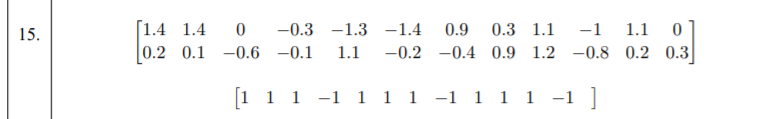

###Теория
Слой Кохонена - стандартный линейный слой, состоящий из адаптивных линейных сумматторов с линейной активационной функцией. Как правило, выходные сигналы слоя обрабатваются так, что наибольший сигнал превращается в единичный, а остальные - в нулевой. Обучить такой слой можно итеративно или при помощи алгоритма кластеризации k-means. Нужно подбирать веса нейронов w таким образом, чтобы они представляли собой центры тяжести $c_j$ для каждого из кластеров $K_j$, на который слой Кохонена делит входное множество Х. Такое обучение является корректным, поскольку скалярное произведение <x,w> пропорционально косинусу угла между векторами, следовательно максимальный сигнал будет у нейрона, чьи веса w больше всего похожи на входные данные x, которые активируют этот нейрон.

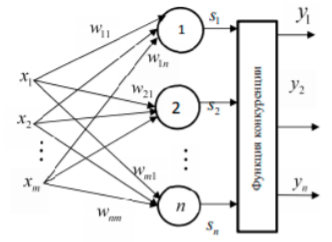


*Самоорганизующаяся карта Кохонена*: это нейросеть с обучением без учителя, представляет собой метод проецирования многомерного пространства на пространство с меньшей размерностью, схожа по принципу с слоем Кохонена, но сохраняет топологическую информацию о кластерах и корректируется при обучении не только активированный нейрон но и соседние.

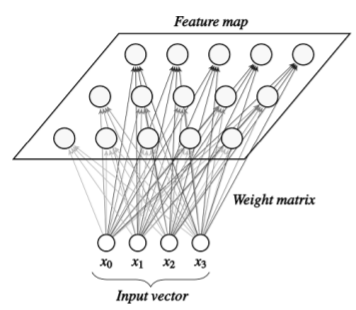


*Сеть векторного квантования с учителем*: решает задачу классификации объектов, выделяя при этом подклассы заданных классов. Состоит из двух слоёв: 1- слой Кохонена, определяющий кластеры из входных данных, результаты работы этой сети интерпретируются как подклассы. 2- линейный слой, определяющий принадлежность каждого из кластеров данному классу. 


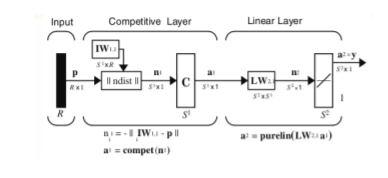

# Листинг кода

In [ ]:
!pip install minisom
!pip install neupy
!pip install neurolab

import numpy as np
from minisom import MiniSom
from neupy.algorithms import SOFM, LVQ
import neurolab as nl
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=46da8a05da0d4ba4e0014f8cf162ef0706769cad37aa144e49d33ac824751c65
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom
     |████████████████████████████████| 226 kB 6.3 MB/s 
     |████████████████████████████████| 92.7 MB 32 kB/s 
     |████████████████████████████████| 3.2 MB 45.0 MB/s 
     |████████████████████████████████| 367 kB 61.8 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found exis

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Формируем входные данные

In [ ]:
x, y, centers = make_blobs(n_samples = 80, cluster_std = 0.1, n_features = 2, centers = 8, center_box = (0, 1.5), return_centers = True, random_state=185)

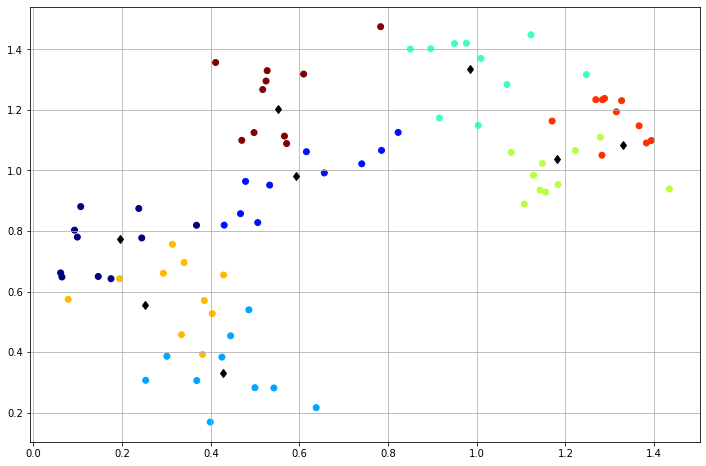

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='jet')
plt.plot(centers[:,0], centers[:, 1], 'dk')
plt.grid(True)

Построим и обучим слой Кохонена

In [ ]:
clusters = 8


In [ ]:
net = nl.net.newc([[0.0, 1.5], [0.0, 1.5]], clusters)

In [ ]:
error = net.train(x, epochs=500, show=100)

Epoch: 100; Error: 13.35221585880777;
Epoch: 200; Error: 13.589467835410742;
Epoch: 300; Error: 12.828268877365684;
Epoch: 400; Error: 12.17455521356251;
Epoch: 500; Error: 12.139727221879207;
The maximum number of train epochs is reached


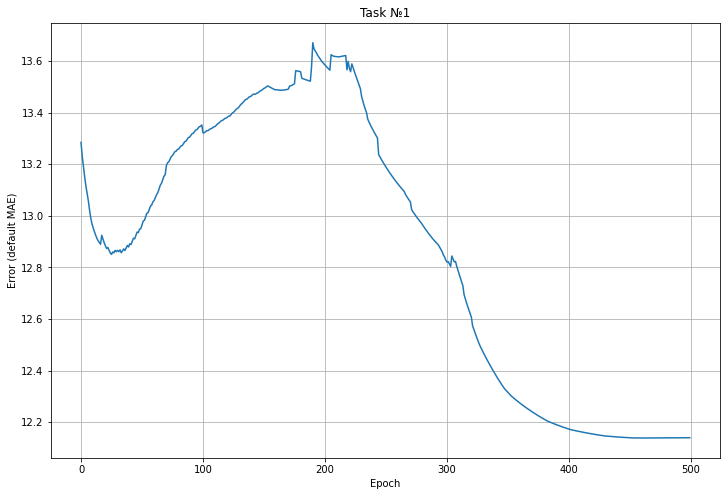

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Task №1')
plt.plot(error)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error (default MAE)')
None

Все центры кластеров

In [ ]:
weightCenters = net.layers[0].np['w']

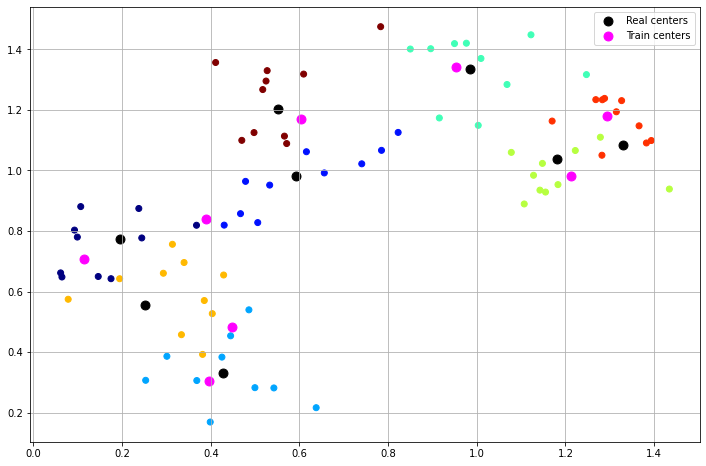

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='jet')
plt.scatter(centers[:,0], centers[:, 1], s = 80, color = 'black', label="Real centers")
plt.scatter(weightCenters[:,0], weightCenters[:,1], s = 80, color = 'magenta', label="Train centers")
plt.grid()
plt.legend()
plt.show()

Сгенерируем 5 точек и подадим в сеть

In [ ]:
randomPoints = np.array([[np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)] for i in range(5)])

In [ ]:
randomPoints

array([[0.54164882, 0.11943219],
       [0.39618858, 0.70632642],
       [0.55197666, 1.25137291],
       [0.37511271, 0.80394516],
       [0.16201104, 0.63016471]])

In [ ]:
predicted = net.sim(randomPoints)
clusterPredicted = np.argmax(predicted, axis=1)

In [ ]:
print('Clusters : ', end = '')
for i in clusterPredicted:
    print(i, end = ' ')

Clusters : 5 3 0 3 1 

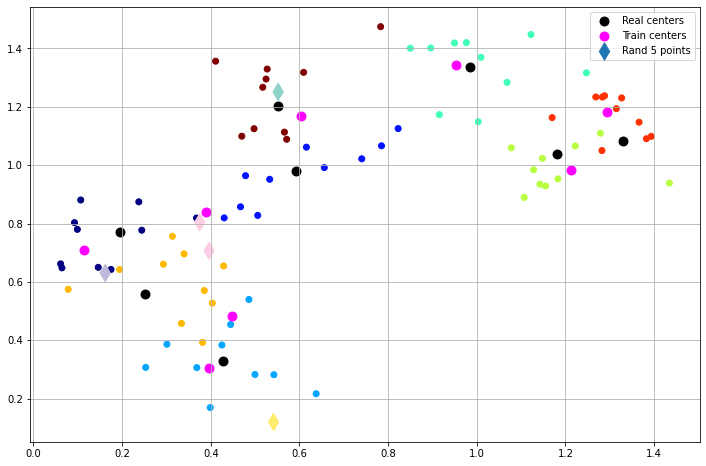

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='jet')
plt.scatter(centers[:,0], centers[:, 1], s = 80, color = 'black', label="Real centers")
plt.scatter(weightCenters[:,0], weightCenters[:,1], s = 80, color = 'magenta', label="Train centers")
plt.scatter(randomPoints[:, 0], randomPoints[:, 1], c=clusterPredicted, cmap='Set3', marker='d', s=150, label='Rand 5 points')
plt.grid()
plt.legend()
plt.show()

Формируем входные данные

In [ ]:
x2, y2, centers2 = make_blobs(n_samples=80, cluster_std=0.1, n_features=2, centers=8, return_centers = True, center_box=(0, 1.5), random_state=87)

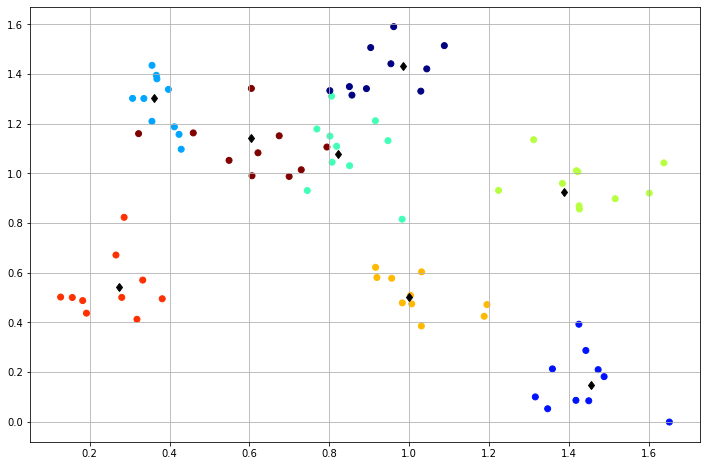

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='jet')
plt.plot(centers2[:,0], centers2[:, 1], 'dk')
plt.grid(True)

Обучим сеть и посмотрим на результаты

In [ ]:
epochs = 150

In [ ]:
som = MiniSom(2, 4, x2.shape[1], sigma=0.66, learning_rate=0.8, activation_distance='euclidean', topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train(x2, epochs, verbose=True)

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.12927574512074952


In [ ]:
weights = som.get_weights()

In [ ]:
weights[1]

array([[1.00386481, 0.57116408],
       [0.40769176, 1.24488433],
       [0.27246224, 0.62850491],
       [1.42511708, 0.14743975]])

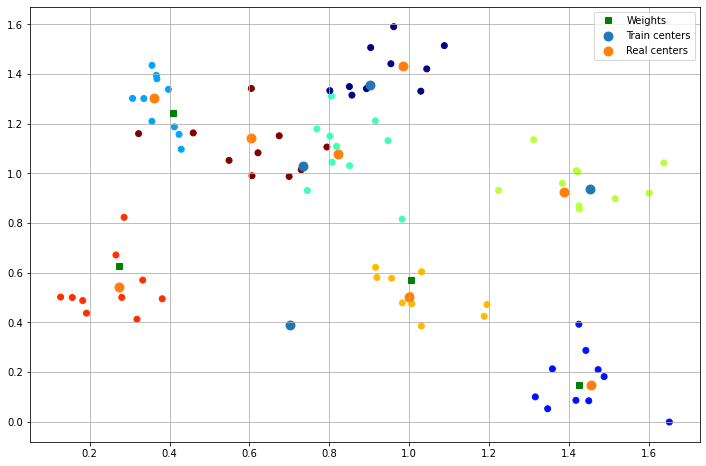

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='jet')
plt.scatter(weights[0][:,0], weights[0][:,1], s=80, label='Train centers')
plt.scatter(centers2[:,0], centers2[:, 1], s=80, label='Real centers')
plt.plot(weights[1][:,0], weights[1][:,1], 'gs', label='Weights')
plt.legend()
plt.grid(True)

Проверим качество разбиения. Генерируем точки и подаём их в сеть.

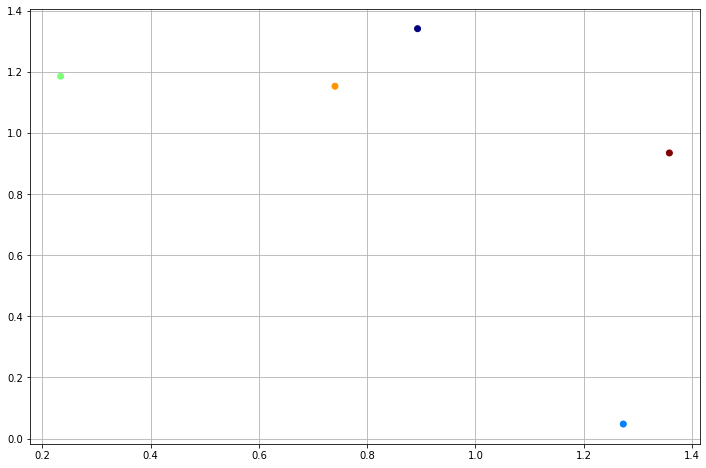

In [ ]:
randomX, randomY = make_blobs(n_samples=5, cluster_std=0.1, n_features=2, centers=8, center_box=(0, 1.5), random_state=87)

plt.figure(figsize=(12, 8))
plt.scatter(randomX[:, 0], randomX[:, 1], c=randomY, cmap='jet')
plt.grid(True)

In [ ]:
winner_coordinates = np.array([som.winner(x) for x in randomX]).T

In [ ]:
cn = np.ravel_multi_index(winner_coordinates, (2, 4))

In [ ]:
print('Clusters : ', end = '')
for i in cn:
    print(i, end = ' ')

Clusters : 7 5 0 1 2 

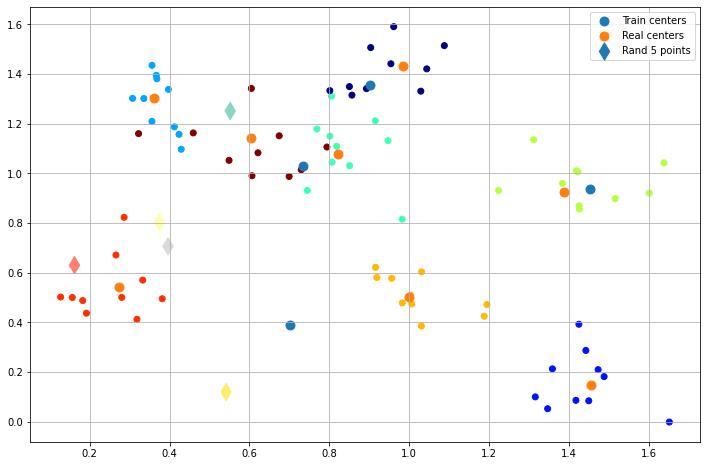

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='jet')
plt.scatter(weights[0][:,0], weights[0][:,1], s=80, label='Train centers')
plt.scatter(centers2[:,0], centers2[:, 1], s=80, label='Real centers')
plt.scatter(randomPoints[:, 0], randomPoints[:, 1], c=cn, cmap='Set3', marker='d', s=150, label='Rand 5 points')
plt.legend()
plt.grid(True)

Формируем входные данные.

In [ ]:
data = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for i in range(20)])

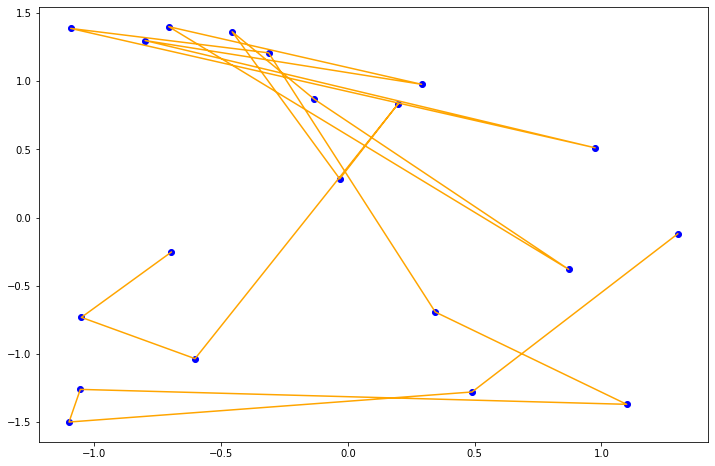

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], c='orange')
plt.scatter(data[:, 0], data[:, 1], c='blue')
None

Обучим сеть.

In [ ]:
np.random.RandomState(10)
neurons = 80

In [ ]:
som = MiniSom(1, neurons, data.shape[1], sigma=8, learning_rate=0.4, neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(data)

/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


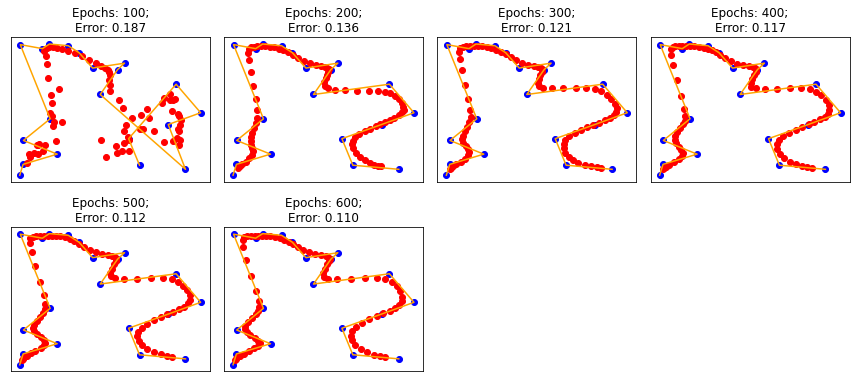

In [ ]:
plt.figure(figsize=(12, 8))

for i, iterations in enumerate(range(100, 601, 100)):
    som.train(data, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i + 1)
    plt.scatter(data[:, 0], data[:, 1], c='blue')
    visit_order = np.argsort([som.winner(t)[1] for t in data])
    plt.plot(data[visit_order][:,0], data[visit_order][:,1], c='orange')
    w= som.get_weights()
    plt.scatter(w[:,:, 0], w[:,:,1], c = 'red')
    plt.title("Epochs: {i};\nError: {e:.3f}".format(i=iterations, e=som.quantization_error(data)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

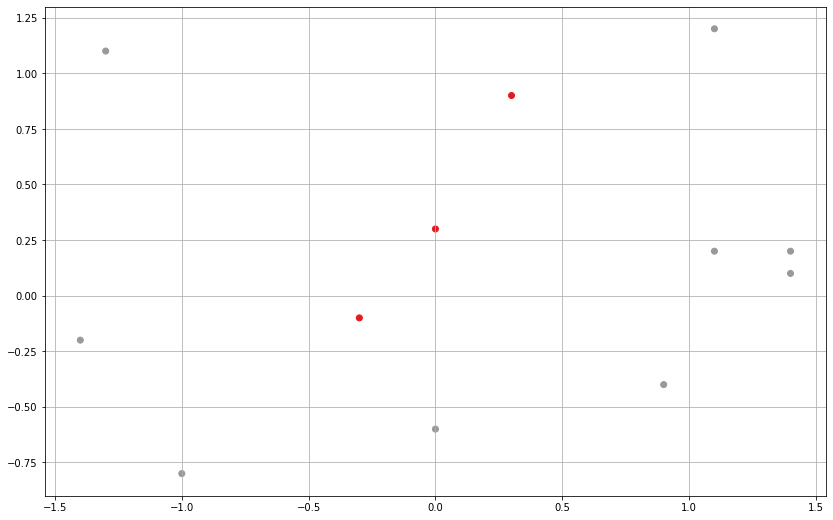

In [ ]:
points = np.array([[1.4, 1.4, 0.0, -0.3, -1.3, -1.4, 0.9, 0.3, 1.1, -1.0, 1.1, 0.0],
                   [0.2, 0.1, -0.6, -0.1, 1.1, -0.2, -0.4, 0.9, 1.2, -0.8, 0.2, 0.3]])

target = np.array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])
pointsT = points.T

plt.figure(figsize=(14, 9))
plt.scatter(pointsT[:, 0], pointsT[:, 1], c=target, cmap='Set1')
plt.grid(True)

Обучим сеть.

In [ ]:
LVQnet = LVQ(n_inputs=2, n_classes=2, step=0.1)
LVQnet.train(pointsT, target, epochs=300)

In [ ]:
xt, yt = np.meshgrid(np.arange(-1.5, 1.51, 0.1), np.arange(-1.5, 1.51, 0.1))
xt.shape = xt.size, 1
yt.shape = yt.size, 1
temp = np.concatenate((xt, yt), axis=1)

pred = LVQnet.predict(temp)

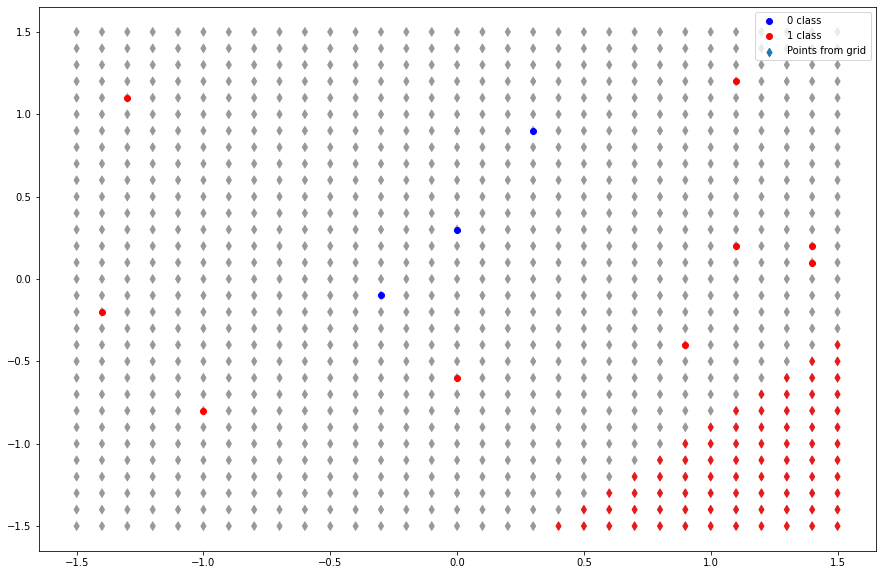

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(temp[:, 0], temp[:, 1], c=pred, cmap='Set1', marker='d', label='Points from grid')

plt.plot([pointsT[i][0] for i in range(12) if target[i] == 0], [pointsT[i][1] for i in range(12) if target[i] == 0], 'bo', label='0 class')
plt.plot([pointsT[i][0] for i in range(12) if target[i] == 1], [pointsT[i][1] for i in range(12) if target[i] == 1], 'ro', label='1 class');

plt.legend()
plt.show()

#Вывод
Я познакомился с сетями Кохонена, которые неплохо себя показали при решении задач. Были расмотрены слой Кохонена, LVQ-сети и SOM-сети. Они были применены в задачах кластеризации.